# Read traveltime field and adjoint field.

In [1]:
from pytomoatt.data import ATTData
import numpy as np

In [2]:
# file to be read
input_file = 'OUTPUT_FILES/OUTPUT_FILES_fields/out_data_sim_group_1.h5'
# input parameters file
par_file = '3_input_params/input_params_inv.yaml'
# grid file
grid_file = 'OUTPUT_FILES/OUTPUT_FILES_fields/out_data_grid.h5'

# read traveltime field
group   = "src_s1"          # "src_$src_name"
dataset = "T_res_inv_0000"  # "T_res_inv_$iter"
data = ATTData.read(input_file, par_file, grid_file, group, dataset)
time_field = data.to_xarray()

# we can access 3D time field data by
time_field_data = time_field[dataset]
print("3D time field array shape: ", time_field_data.shape)

# or we can interp it to a 2D slice at depth
depth = 0.0
tmp = time_field.interp_dep(depth, field=dataset)
longitude   = tmp[:,0]
latitude    = tmp[:,1]
time        = tmp[:,2]

# Similarly, we can do the same for adjoint field
dataset = "adjoint_field_inv_0000"  # "adjoint_field_inv_$iter"
data = ATTData.read(input_file, par_file, grid_file, group, dataset)
adjoint_field = data.to_xarray()

# we can access 3D adjoint field data by
adjoint_field_data = adjoint_field[dataset]

# or we can interp it to a 2D slice at depth
depth = 0.0
adjoint = adjoint_field.interp_dep(depth, field=dataset)[:,2]

3D time field array shape:  (7, 201, 201)


# Pygmt plot time field and adjoint field

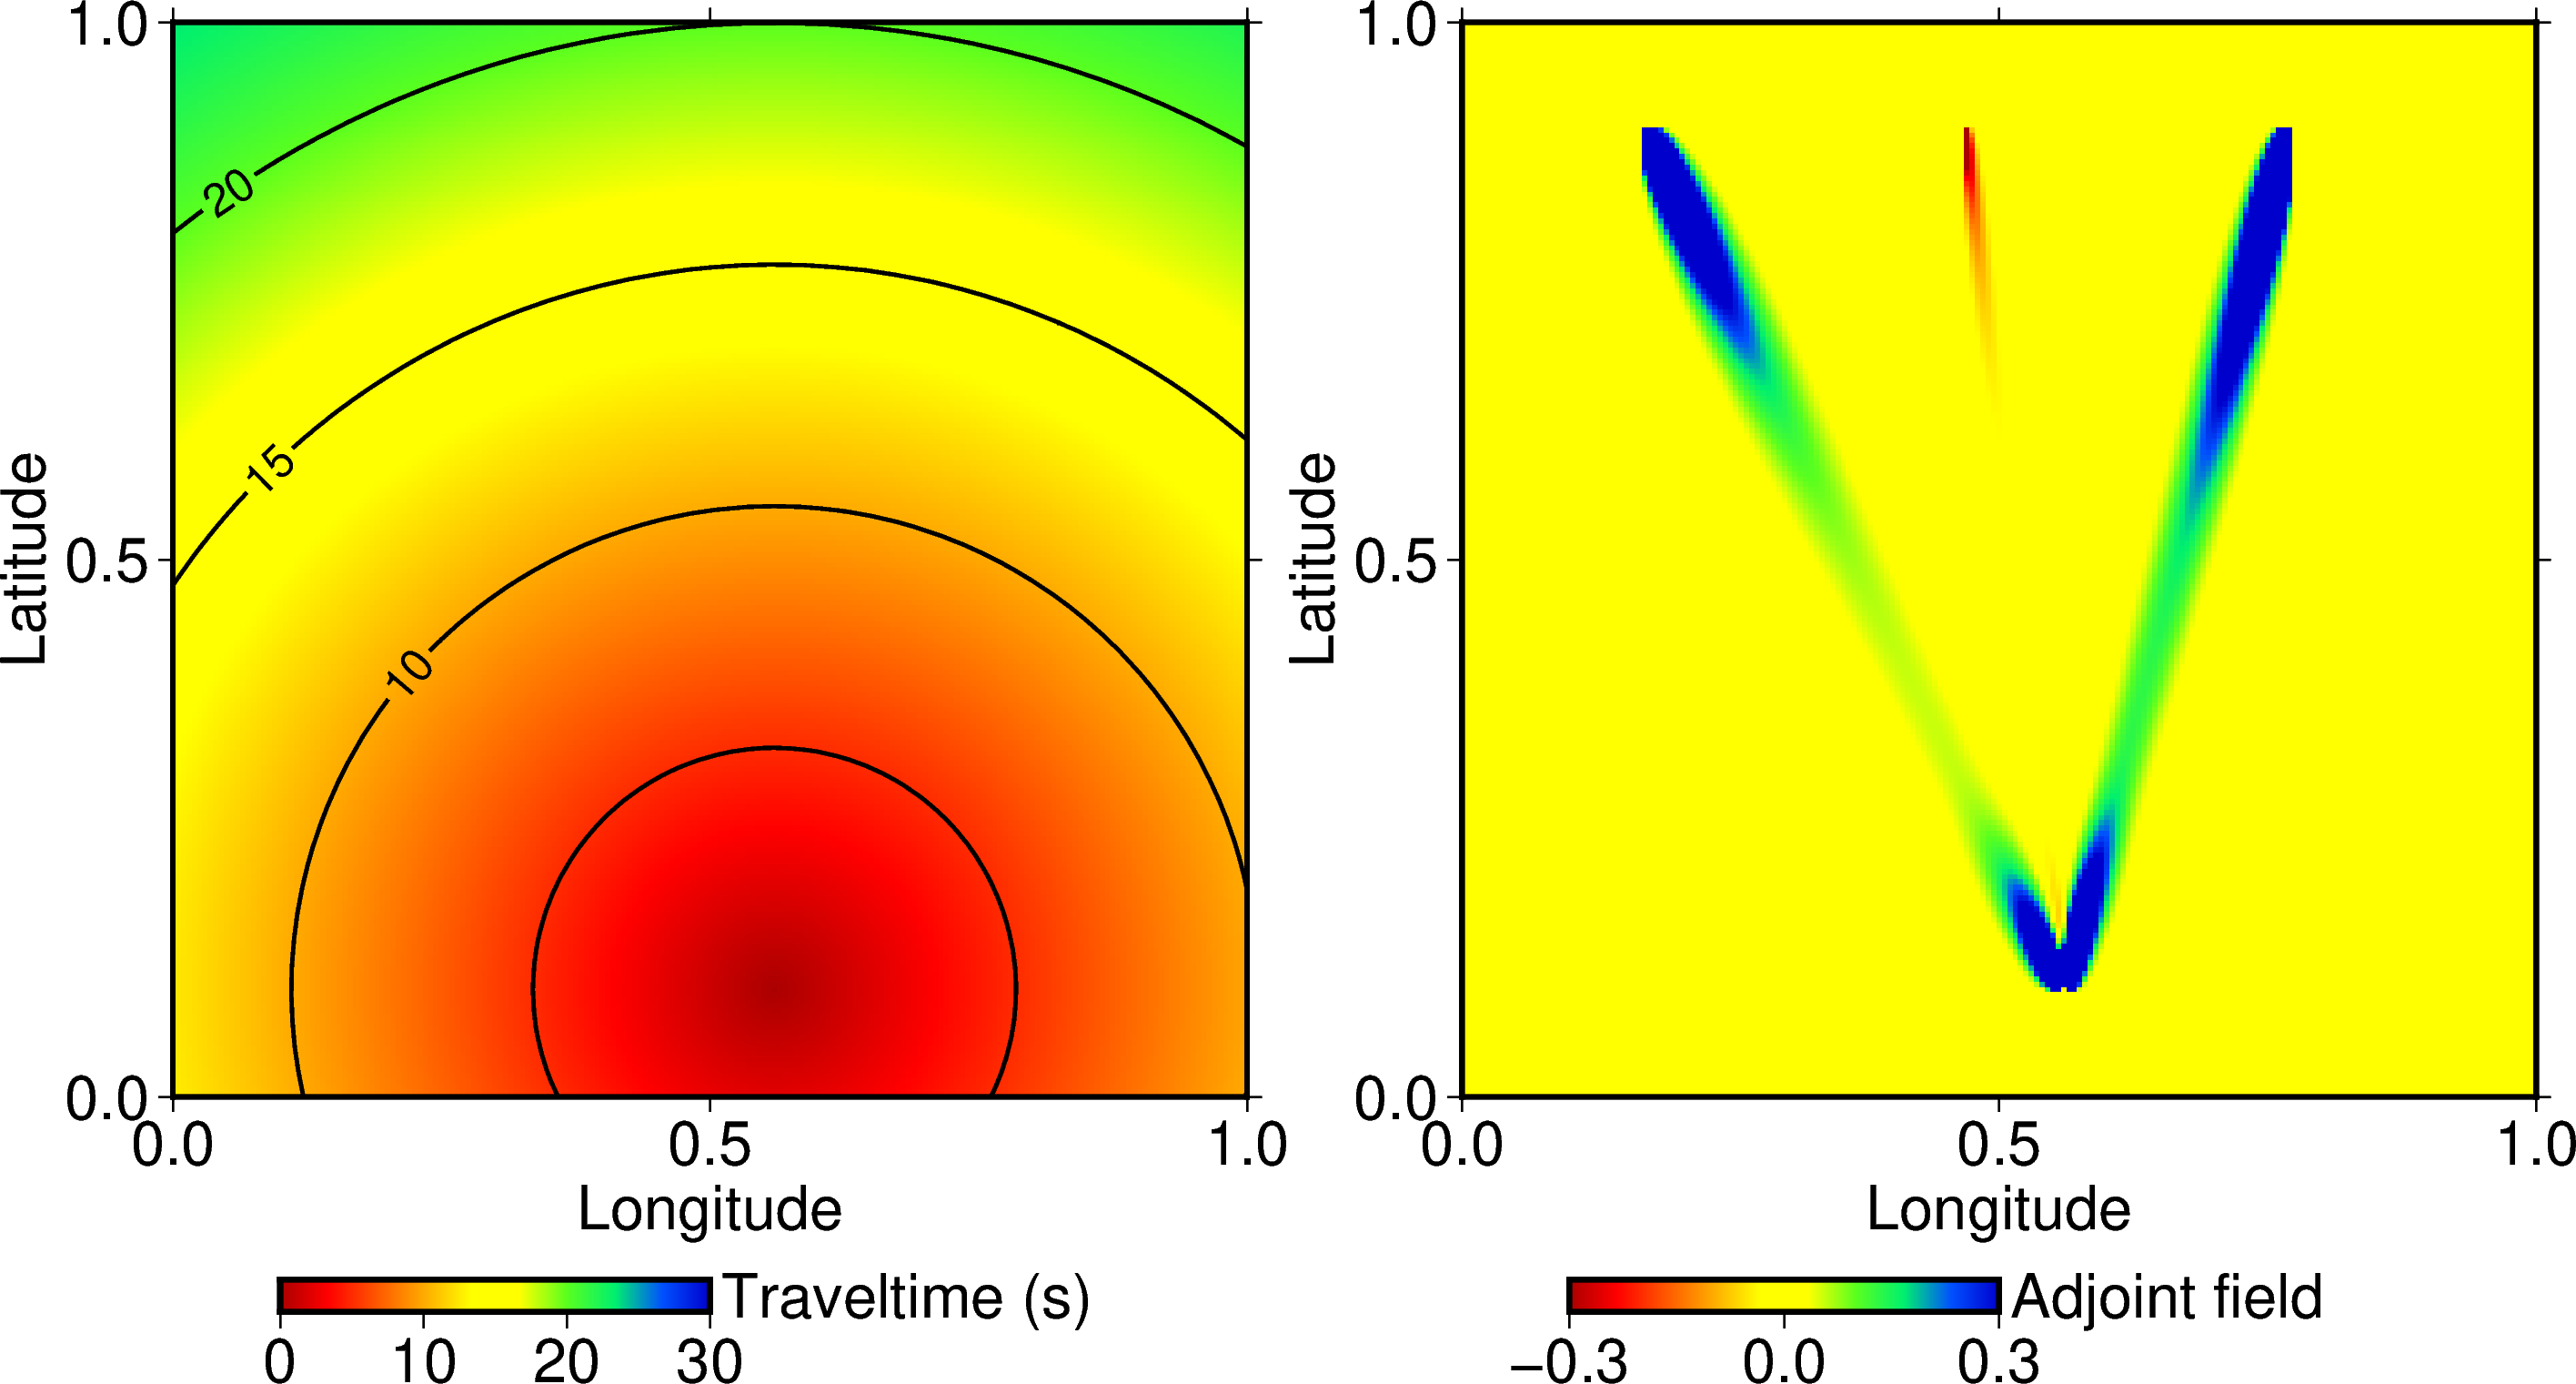

In [14]:
# pygmt plot
import pygmt
from pygmt.clib import Session
with pygmt.clib.Session() as session:
    session.call_module('gmtset', 'FONT 16p')
pygmt.config(IO_SEGMENT_MARKER="<<<")

region = [0,1,0,1]
projection = "X10c/10c"
frame = ["xa0.5+lLongitude", "ya0.5+lLatitude", "nSWe"]

fig = pygmt.Figure()

# ----------- plot time field ------------
pygmt.makecpt(cmap="seis", series=[0, 30], background=True, reverse=False)
grid = pygmt.xyz2grd(x=longitude, y=latitude, z=time, spacing=0.005,region=region,)
fig.grdimage(frame=frame,grid = grid,projection=projection, region=region) # nan_transparent may work
fig.contour(x=longitude, y=latitude, z=time, levels=5, pen="1p,black", annotation="5+f12p")

fig.shift_origin(xshift= 1, yshift=-2)
fig.colorbar(frame = ["a%f"%(10),"y+lTraveltime (s)"], position="+w4c/0.3c+h") # +e,默认是双箭头，f表示forward，b表示background ，w表示长宽，h表示水平
fig.shift_origin(xshift=-1, yshift=+2)

# ----------- plot adjoint field ------------
fig.shift_origin(xshift= 12)
pygmt.makecpt(cmap="seis", series=[-0.3, 0.3], background=True, reverse=False)
grid = pygmt.xyz2grd(x=longitude, y=latitude, z=adjoint, spacing=0.005,region=region,)
fig.grdimage(frame=frame,grid = grid,projection=projection, region=region) # nan_transparent may work

fig.shift_origin(xshift= 1, yshift=-2)
fig.colorbar(frame = ["a%f"%(0.3),"y+lAdjoint field"], position="+w4c/0.3c+h") # +e,默认是双箭头，f表示forward，b表示background ，w表示长宽，h表示水平
fig.shift_origin(xshift=-1, yshift=+2)

fig.show()
fig.savefig('img/3a_source_field.png')